In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
import seaborn as sns
from google.colab import files

In [0]:
import tldextract

In [0]:
#dataset sa benignim url-ovima
ds_benign= pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/Benign_list_big_final.csv', header = None)
ds_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 1 columns):
0    35378 non-null object
dtypes: object(1)
memory usage: 276.5+ KB


In [0]:
ds_benign.columns = ['url']
ds_benign['label'] = 0
ds_benign.head()

,url,label
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0


In [0]:
#dataset sa spam url-ovima
ds_spam = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/spam_dataset.csv', header = None)
ds_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 1 columns):
0    12000 non-null object
dtypes: object(1)
memory usage: 93.8+ KB


In [0]:
ds_spam.columns = ['url']
ds_spam['label'] = 1
ds_spam.head()

,url,label
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,1
1,http://archive.salisburyjournal.co.uk/2007/3/6...,1
2,http://appbasic.jettons.co.uk/links/index.html,1
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,1
4,http://acard4u.co.uk/product_reviews.php?cPath...,1


In [0]:
#dataset sa malware url-ovima
ds_malware = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/Malware_dataset.csv', header = None)
ds_malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11566 entries, 0 to 11565
Data columns (total 1 columns):
0    11566 non-null object
dtypes: object(1)
memory usage: 90.4+ KB


In [0]:
ds_malware.columns = ['url']
ds_malware['label'] = 1
ds_malware.head()

,url,label
0,http://gzzax.livechatvalue.com/chat/chatClient...,1
1,http://gzzax.livechatvalue.com/chat/chatClient...,1
2,http://gzzax.livechatvalue.com/chat/chatClient...,1
3,http://gzzax.livechatvalue.com/chat/chatClient...,1
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,1


In [0]:
#dataset sa phishing url-ovima
ds_phishing = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/phishing_dataset.csv', header = None)
ds_phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 1 columns):
0    9965 non-null object
dtypes: object(1)
memory usage: 77.9+ KB


In [0]:
ds_phishing.columns = ['url']
ds_phishing['label'] = 1
ds_phishing.head()

,url,label
0,http://v2.email-marketing.adminsimple.com/trac...,1
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,1
2,http://webmail2.centurytel.net/hwebmail/servic...,1
3,http://www.google.com.ng/imgres?imgurl=http://...,1
4,http://webmail2.centurytel.net/hwebmail/servic...,1


In [0]:
#dataset sa defacement url-ovima
ds_defacement = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/DefacementSitesURLFiltered.csv', header = None)
ds_defacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96457 entries, 0 to 96456
Data columns (total 1 columns):
0    96457 non-null object
dtypes: object(1)
memory usage: 753.6+ KB


In [0]:
ds_defacement.columns = ['url']
ds_defacement['label'] = 1
#shuffle dataseta da bi dobili raznovrsnije podatke, jer cemo posle uzeti samo 10k od oko 90k redova iz njega
ds_defacement = ds_defacement.sample(frac=1).reset_index(drop=True)
ds_defacement.head()

,url,label
0,http://www.acranes.com/index.php?option=com_so...,1
1,http://www.arjanland-kerstbomen.nl/component/m...,1
2,http://www.lontechshop.co.uk/index.html,1
3,http://www.bckeepfit.nl/index.php/component/ma...,1
4,http://danielfabri.com.ar/438/index.html,1


In [0]:
ds_comb = ds_benign.append(ds_spam)
ds_comb = ds_comb.append(ds_malware)
ds_comb = ds_comb.append(ds_phishing)
#uzimamo 20k redova iz defacement dataset-a jer je preveliki, a hocemo da sacuvamo odnos losih i dobrih url-ova priblizno 60-40
ds_defacement = ds_defacement[:20000]
ds_comb = ds_comb.append(ds_defacement)
ds_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88909 entries, 0 to 19999
Data columns (total 2 columns):
url      88909 non-null object
label    88909 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [0]:
ds_comb['label'].value_counts()

1    53531
0    35378
Name: label, dtype: int64

In [0]:
#shuffle dataseta da bi videli raznovrsnije podatke
ds_comb = ds_comb.sample(frac=1).reset_index(drop=True)
ds_comb.head()

,url,label
0,http://censor.net.ua/video_news/335031/miting_...,0
1,http://digg.com/video/four-realistic-predictio...,0
2,http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E...,1
3,http://www.centerimoveis.com.br/fale-conosco/t...,1
4,http://archive.salisburyjournal.co.uk/2000/10/...,1


In [0]:
#fja za dobijanje deep url-a iz url-a jer samo deep url koristimo za MultinomialNB
def get_deep_url_from_url(url):
  path = urlparse(url)
  if path.query:
    return str(path.path) + str('?') + str(path.query)
  else:
    return str(path.path)

ds_comb['deep url'] = ds_comb['url'].apply(lambda x : get_deep_url_from_url(x))
ds_comb['len deep url'] = ds_comb['deep url'].apply(lambda x : len(x))
ds_comb.head()

,url,label,deep url,len deep url
0,http://censor.net.ua/video_news/335031/miting_...,0,/video_news/335031/miting_protiv_demilitarizat...,85
1,http://digg.com/video/four-realistic-predictio...,0,/video/four-realistic-predictions-about-where-...,74
2,http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E...,1,/%E5%B9%BC%E5%84%BF%E5%9B%AD%E6%B5%B7%E6%A3%89...,83
3,http://www.centerimoveis.com.br/fale-conosco/t...,1,/fale-conosco/trabalhe.html,27
4,http://archive.salisburyjournal.co.uk/2000/10/...,1,/2000/10/13/233583.html,23


In [0]:
#radimo split deep url-a na reci da bi koristili to kao feature za MultinomialNB
import re
def split_deep_url(url):
    word_list = re.compile(r'[\:/?=\-&$~<>;%_\.\+\\]+',re.UNICODE).split(url)
    #cuvaju se samo reci duze od 2 karaktera u deep url
    word_list1 = [elem for elem in word_list if len(elem) > 2] 
    words_string = ' '.join(word_list1)
    return str(words_string)

In [0]:
ds_comb['deep url'] = ds_comb['deep url'].apply(lambda x : split_deep_url(x))
ds_comb.head()

,url,label,deep url,len deep url
0,http://censor.net.ua/video_news/335031/miting_...,0,video news 335031 miting protiv demilitarizats...,85
1,http://digg.com/video/four-realistic-predictio...,0,video four realistic predictions about where t...,74
2,http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E...,1,,83
3,http://www.centerimoveis.com.br/fale-conosco/t...,1,fale conosco trabalhe html,27
4,http://archive.salisburyjournal.co.uk/2000/10/...,1,2000 233583 html,23


In [0]:
#primenjujemo CountVectorizer da bismo imali ulaz za MultinomialDB
x = ds_comb['deep url']
y = ds_comb['label']

In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59569,)
(29340,)
(59569,)
(29340,)


In [0]:
from sklearn import feature_extraction
vectorized = feature_extraction.text.CountVectorizer()
x_train_t = vectorized.fit_transform(x_train)
vectorized.vocabulary_

{'thisisessex': 63594,
 'index': 42580,
 'cfm': 30295,
 '27849': 10406,
 'return': 57327,
 'cat': 29897,
 'action': 22766,
 'pricelist': 54923,
 'torrent': 64052,
 '4189452': 15097,
 'edwards': 35656,
 'nicole': 50213,
 'brendon': 28592,
 'epub': 36321,
 'zeke23': 68678,
 'html': 41584,
 'independent': 42577,
 'international': 43020,
 '31946': 13271,
 'content': 31859,
 'plugins': 54002,
 'meks': 48037,
 'flexible': 38019,
 'shortcodes': 59828,
 'css': 32494,
 'font': 38202,
 'awesome': 25543,
 'min': 48444,
 'ver': 66044,
 '4189635': 15144,
 'jav': 43652,
 'censored': 30193,
 'venu': 66042,
 '504': 16678,
 'all': 23883,
 'takes': 62842,
 'little': 46444,
 'encouragement': 36093,
 'get': 39389,
 'dick': 33983,
 'hard': 40657,
 'instantly': 42913,
 '21my': 8565,
 'stepm': 61655,
 'editors': 35608,
 'updates': 65332,
 'lazy': 45834,
 'hazy': 40798,
 'summer': 62197,
 'art': 24882,
 'stroll': 61919,
 'burnham': 28997,
 'market': 47529,
 'sport': 61230,
 'not': 50488,
 'tram': 64244,
 'cua

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_t, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
x_test_t = vectorized.transform(x_test)
x_test_t

<29340x68979 sparse matrix of type '<class 'numpy.int64'>'
	with 203871 stored elements in Compressed Sparse Row format>

In [0]:
y_pred = nb.predict(x_test_t)

In [0]:
metrics.accuracy_score(y_test, y_pred)

0.9585207907293797

In [0]:
metrics.confusion_matrix(y_test, y_pred)

array([[11111,   564],
       [  653, 17012]])

In [0]:
#dobijamo predvidjene verovatnoce za pripadnost klasi 0 i 1, respektivno
#klasa 0 znaci label = 0 
y_pred_proba = nb.predict_proba(x_test_t)
y_pred_proba

array([[2.80778981e-02, 9.71922102e-01],
       [6.26072623e-01, 3.73927377e-01],
       [3.75271844e-13, 1.00000000e+00],
       ...,
       [5.78716015e-01, 4.21283985e-01],
       [3.97285583e-02, 9.60271442e-01],
       [4.58491019e-02, 9.54150898e-01]])

In [0]:
y_pred_proba_0 = y_pred_proba[:, 0]
y_pred_proba_1 = y_pred_proba[:, 1]

In [0]:
#pravimo dataframe od x_test jer hocemo dobijene verovatnoce da koristimo kao feature za SVM i RF
df_test = x_test.to_frame()
df_test.head()

,deep url
41395,2007 296092 html
27232,news VideoDisplay 411547 html
67972,rugs product reviews php products 919 osCsid 0...
12404,lactation support lactation consultation
67870,bbs php table torrent song 46799 page


In [0]:
df_test['label_proba_0'] = y_pred_proba_0
df_test['label_proba_1'] = y_pred_proba_1
df_test.head()

,deep url,label_proba_0,label_proba_1
41395,2007 296092 html,2.807790e-02,0.971922
27232,news VideoDisplay 411547 html,6.260726e-01,0.373927
67972,rugs product reviews php products 919 osCsid 0...,3.752718e-13,1.000000
12404,lactation support lactation consultation,6.845361e-02,0.931546
67870,bbs php table torrent song 46799 page,9.999475e-01,0.000052


In [0]:
#radicemo join sa originalnim datasetom pa nam ne treba deep url kolona
df_test = df_test.drop('deep url', axis = 1)
df_test.head()

,label_proba_0,label_proba_1
41395,2.807790e-02,0.971922
27232,6.260726e-01,0.373927
67972,3.752718e-13,1.000000
12404,6.845361e-02,0.931546
67870,9.999475e-01,0.000052


In [0]:
#join sa originalnim datasetom - radi join po indeksu, a dodeljuje nan vrednosti u redovima koji nisu u x_test
final_ds = ds_comb.join(df_test)
final_ds.head()

,url,label,deep url,len deep url,label_proba_0,label_proba_1
0,http://censor.net.ua/video_news/335031/miting_...,0,video news 335031 miting protiv demilitarizats...,85,0.999985,0.000015
1,http://digg.com/video/four-realistic-predictio...,0,video four realistic predictions about where t...,74,NaN,NaN
2,http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E...,1,,83,0.397908,0.602092
3,http://www.centerimoveis.com.br/fale-conosco/t...,1,fale conosco trabalhe html,27,NaN,NaN
4,http://archive.salisburyjournal.co.uk/2000/10/...,1,2000 233583 html,23,NaN,NaN


In [0]:
#izbacujemo redove sa nan vrednostima i resetujemo index da bi sad radili sa novim datasetom predikciju za SVM i RF
final_ds = final_ds.dropna()
final_ds = final_ds.reset_index(drop=True)
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29340 entries, 0 to 29339
Data columns (total 6 columns):
url              29340 non-null object
label            29340 non-null int64
deep url         29340 non-null object
len deep url     29340 non-null int64
label_proba_0    29340 non-null float64
label_proba_1    29340 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ MB


In [0]:
#dodajemo kolone za duzinu domain-a i suffix

def get_len_of_domain_url(url):
  ext = tldextract.extract(url)
  return len(ext.domain)
    
def get_suffix_url(url):
  ext = tldextract.extract(url)
  return str(ext.suffix)

final_ds['len of domain'] = final_ds['url'].apply(lambda x : get_len_of_domain_url(x))
final_ds['suffix'] = final_ds['url'].apply(lambda x : get_suffix_url(x))

In [0]:
#suffix kolona (top level domain-tld u radu) ima previse razlicitih vrednosti i radi se cutoff za frekvenciju < 50  
minFreq = 50 
suffix_values = final_ds['suffix'].value_counts() # Specific column 
to_remove = suffix_values[suffix_values <= minFreq].index
final_ds['suffix'].replace(to_remove, np.nan, inplace=True)

In [0]:
#sada imamo nedostajuce vrednosti(nan) u koloni suffix, pa izbacujemo takve redove i resetujemo index
final_ds = final_ds.dropna()
final_ds = final_ds.reset_index(drop=True)
final_ds['suffix'].value_counts()

com       12046
co.uk      3353
net        2218
info       1364
de          827
ac.uk       825
org         679
com.br      616
ru          541
pl          461
nl          426
vn          413
it          355
cc          304
jp          238
ro          229
com.au      215
net.ua      160
com.vn      156
org.uk      152
gr          145
co.id       142
fr          139
eu          132
cn          129
in          120
ua          118
to          113
gov.uk      110
ir          108
es           98
asia         96
ch           90
tv           88
com.my       86
net.vn       86
cz           84
at           79
hu           78
dk           74
cl           73
com.ua       70
gov.br       69
co.za        67
             63
com.ar       60
be           56
com.cn       53
sk           51
Name: suffix, dtype: int64

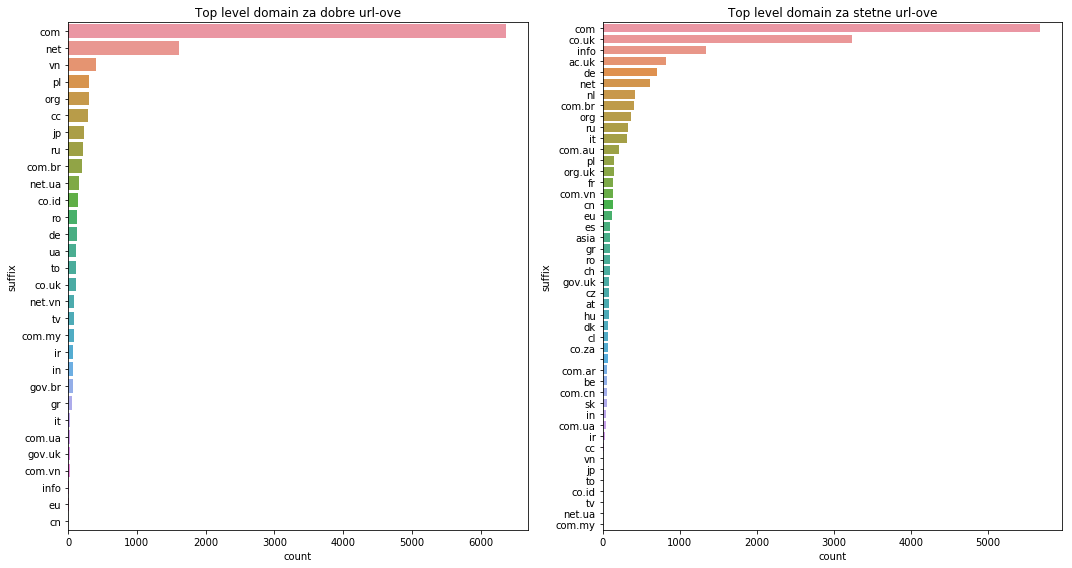

In [0]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(1,2,1)  
plt.title('Top level domain za dobre url-ove')
sns.countplot(y = final_ds[final_ds['label']==0]['suffix'], order = final_ds[final_ds['label']==0]['suffix'].value_counts().index)
fig.add_subplot(1,2,2) 
plt.title('Top level domain za stetne url-ove')
sns.countplot(y = final_ds[final_ds['label']==1]['suffix'],order = final_ds[final_ds['label']==1]['suffix'].value_counts().index) 
plt.tight_layout()
plt.show()

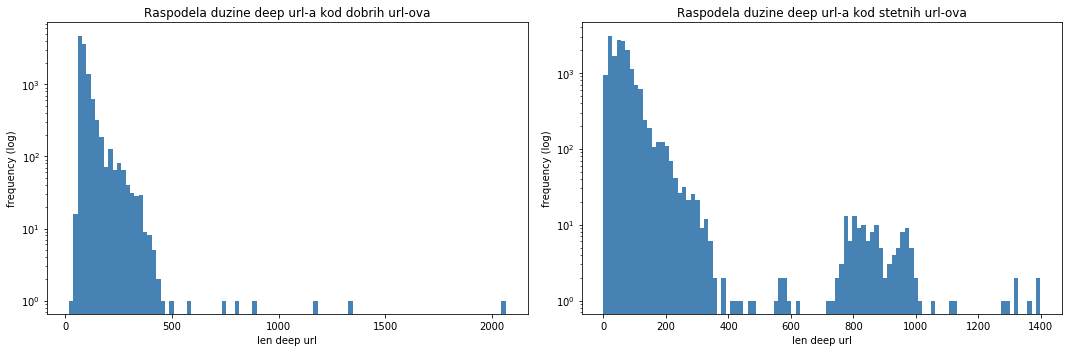

In [0]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)  
plt.title('Raspodela duzine deep url-a kod dobrih url-ova')
plt.hist(final_ds[final_ds['label']==0]['len deep url'], log = True, color = 'steelblue', bins=100)
plt.ylabel("frequency (log)")
plt.xlabel("len deep url")
fig.add_subplot(1,2,2) 
plt.title('Raspodela duzine deep url-a kod stetnih url-ova')
plt.hist(final_ds[final_ds['label']==1]['len deep url'], log = True, color = 'steelblue', bins=100)
plt.ylabel("frequency (log)")
plt.xlabel("len deep url")
plt.tight_layout()
plt.show()

In [0]:
#izbacujemo nepotrebne kolone (url, deep url) i enkodiramo kategoricku promenljivu suffix, kao u radu
final_ds = final_ds.drop(['url', 'deep url'], axis = 1)
final_ds = pd.get_dummies(final_ds, prefix = ['suffix'], columns = ['suffix'])
final_ds.head()

,label,len deep url,label_proba_0,label_proba_1,len of domain,suffix_,suffix_ac.uk,suffix_asia,suffix_at,suffix_be,suffix_cc,suffix_ch,suffix_cl,suffix_cn,suffix_co.id,suffix_co.uk,suffix_co.za,suffix_com,suffix_com.ar,suffix_com.au,suffix_com.br,suffix_com.cn,suffix_com.my,suffix_com.ua,suffix_com.vn,suffix_cz,suffix_de,suffix_dk,suffix_es,suffix_eu,suffix_fr,suffix_gov.br,suffix_gov.uk,suffix_gr,suffix_hu,suffix_in,suffix_info,suffix_ir,suffix_it,suffix_jp,suffix_net,suffix_net.ua,suffix_net.vn,suffix_nl,suffix_org,suffix_org.uk,suffix_pl,suffix_ro,suffix_ru,suffix_sk,suffix_to,suffix_tv,suffix_ua,suffix_vn
0,0,85,9.999850e-01,0.000015,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,83,3.979083e-01,0.602092,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,72,1.053125e-11,1.000000,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,83,3.979083e-01,0.602092,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,48,5.679100e-02,0.943209,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#prebacujemo kolone u numericke
final_ds['len of domain'] = pd.to_numeric(final_ds['len of domain'])
final_ds['len deep url'] = pd.to_numeric(final_ds['len deep url'])
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28255 entries, 0 to 28254
Data columns (total 54 columns):
label            28255 non-null int64
len deep url     28255 non-null int64
label_proba_0    28255 non-null float64
label_proba_1    28255 non-null float64
len of domain    28255 non-null int64
suffix_          28255 non-null uint8
suffix_ac.uk     28255 non-null uint8
suffix_asia      28255 non-null uint8
suffix_at        28255 non-null uint8
suffix_be        28255 non-null uint8
suffix_cc        28255 non-null uint8
suffix_ch        28255 non-null uint8
suffix_cl        28255 non-null uint8
suffix_cn        28255 non-null uint8
suffix_co.id     28255 non-null uint8
suffix_co.uk     28255 non-null uint8
suffix_co.za     28255 non-null uint8
suffix_com       28255 non-null uint8
suffix_com.ar    28255 non-null uint8
suffix_com.au    28255 non-null uint8
suffix_com.br    28255 non-null uint8
suffix_com.cn    28255 non-null uint8
suffix_com.my    28255 non-null uint8
suffix_com.ua

In [0]:
#uzimamo X i y za RandomForest
X_rf = final_ds.drop(['label'],axis=1) 
y_rf = final_ds['label']

#train test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.1, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train_rf)
scaler.transform(X_train_rf)
scaler.transform(X_test_rf)

array([[-0.77507905, -0.86096366,  0.86096366, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [-0.34106105, -0.94005643,  0.94005643, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [-0.20064346, -0.94672924,  0.94672924, ..., -0.05511112,
        -0.06408287, -0.12234243],
       ...,
       [-0.29000011, -0.94677968,  0.94677968, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [-0.08575634, -0.08727436,  0.08727436, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [ 0.04189602, -0.94677968,  0.94677968, ..., -0.05511112,
        -0.06408287, -0.12234243]])

In [0]:
# koristimo gini loss kao u radu
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=30, criterion = 'gini')
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
y_train_rf_pred = rf.predict(X_train_rf)
y_test_rf_pred = rf.predict(X_test_rf)
print('Train report: {}'.format(metrics.classification_report(y_train_rf, y_train_rf_pred)))
print('Test report: {}'.format(metrics.classification_report(y_test_rf, y_test_rf_pred)))

Train report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10329
           1       1.00      1.00      1.00     15100

    accuracy                           1.00     25429
   macro avg       1.00      1.00      1.00     25429
weighted avg       1.00      1.00      1.00     25429

Test report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1167
           1       0.99      1.00      0.99      1659

    accuracy                           0.99      2826
   macro avg       0.99      0.99      0.99      2826
weighted avg       0.99      0.99      0.99      2826



In [0]:
metrics.accuracy_score(y_train_rf, y_train_rf_pred)

0.9997640489205238

In [0]:
metrics.accuracy_score(y_test_rf, y_test_rf_pred)

0.9939844302901628

In [0]:
confusion_matrix(y_test_rf,y_test_rf_pred)

array([[1158,    9],
       [   8, 1651]])

In [0]:
#najbitniji atributi opadajuce
feature_importances = zip(list(X_rf), rf.feature_importances_)
feature_importances_sort = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for feature in feature_importances_sort:
    print(feature)

('label_proba_0', 0.38953075611074833)
('label_proba_1', 0.36317124256680366)
('len deep url', 0.1430165997662464)
('len of domain', 0.028577471506548772)
('suffix_co.uk', 0.01660172810113354)
('suffix_com', 0.01127119359500166)
('suffix_net', 0.008852850461017723)
('suffix_info', 0.0063988953539053876)
('suffix_jp', 0.004695989915861744)
('suffix_ac.uk', 0.0043644434645387295)
('suffix_tv', 0.003547071679517135)
('suffix_vn', 0.002864186886727428)
('suffix_ua', 0.0022725096902112994)
('suffix_cc', 0.002082102407519127)
('suffix_com.au', 0.0015557665784455875)
('suffix_net.ua', 0.0014635887191972942)
('suffix_ir', 0.0013445240442570947)
('suffix_de', 0.0012041404563777134)
('suffix_nl', 0.0009600469548205634)
('suffix_ru', 0.0008359195952550315)
('suffix_org.uk', 0.0006297741559574009)
('suffix_co.id', 0.0005779217901262951)
('suffix_it', 0.000552519942508037)
('suffix_org', 0.0005139808631341671)
('suffix_to', 0.0005085669639956685)
('suffix_com.br', 0.0004628774278056288)
('suffix_fr

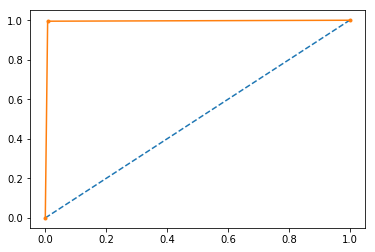

In [0]:
fpr, tpr, thresholds = roc_curve(y_test_rf,y_test_rf_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [0]:
#ne moramo opet raditi train test split ali da bi znali da sad radimo sa svm
X_train_svm = X_train_rf
y_train_svm = y_train_rf
X_test_svm = X_test_rf
y_test_svm = y_test_rf

In [0]:
#linear SVM
linear_svm = svm.LinearSVC(loss='hinge', C=1.0)
linear_svm.fit(X_train_svm, y_train_svm)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [0]:
y_train_svm_pred = linear_svm.predict(X_train_svm)
y_test_svm_pred = linear_svm.predict(X_test_svm)
print('Train report: {}'.format(metrics.classification_report(y_train_svm, y_train_svm_pred)))
print('Test report: {}'.format(metrics.classification_report(y_test_svm, y_test_svm_pred)))

Train report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10329
           1       0.99      0.94      0.96     15100

    accuracy                           0.96     25429
   macro avg       0.95      0.96      0.96     25429
weighted avg       0.96      0.96      0.96     25429

Test report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1167
           1       0.99      0.95      0.97      1659

    accuracy                           0.96      2826
   macro avg       0.96      0.97      0.96      2826
weighted avg       0.97      0.96      0.96      2826



In [0]:
metrics.accuracy_score(y_train_svm, y_train_svm_pred)

0.958708561091667

In [0]:
metrics.accuracy_score(y_test_svm, y_test_svm_pred)

0.9639065817409767

In [0]:
confusion_matrix(y_test_svm,y_test_svm_pred)

array([[1150,   17],
       [  85, 1574]])

In [0]:
#SVM sa rbf kernelom
rbf_svm = svm.SVC(kernel='rbf', gamma=0.1, C=1)
rbf_svm.fit(X_train_svm, y_train_svm)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_train_rbf_pred = rbf_svm.predict(X_train_svm)
y_test_rbf_pred = rbf_svm.predict(X_test_svm)
print('Train report: {}'.format(metrics.classification_report(y_train_svm, y_train_rbf_pred)))
print('Test report: {}'.format(metrics.classification_report(y_test_svm, y_test_rbf_pred)))

Train report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99     10329
           1       0.99      0.99      0.99     15100

    accuracy                           0.99     25429
   macro avg       0.99      0.99      0.99     25429
weighted avg       0.99      0.99      0.99     25429

Test report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1167
           1       0.98      0.99      0.99      1659

    accuracy                           0.98      2826
   macro avg       0.98      0.98      0.98      2826
weighted avg       0.98      0.98      0.98      2826



In [0]:
metrics.accuracy_score(y_train_svm, y_train_rbf_pred)

0.9885563726454049

In [0]:
metrics.accuracy_score(y_test_svm, y_test_rbf_pred)

0.9844302901627743

In [0]:
confusion_matrix(y_test_svm,y_test_rbf_pred)

array([[1139,   28],
       [  16, 1643]])

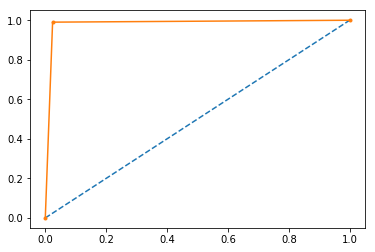

In [0]:
fpr, tpr, thresholds = roc_curve(y_test_svm,y_test_rbf_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [0]:
#prikazane su samo SVM i RF sa parametrima koji daju najvecu tacnost, isprobane su razlicite vrednosti i razliciti dobijeni rezultati su korisceni u prezentaciji

In [0]:
#rezultati koje dobijamo kada drop-ujemo kolone predikcija iz multinomijalnog naivnog bajesa, prikazane tacnosti za test skup radi poredjenja

In [0]:
final_ds.head()

,label,len deep url,label_proba_0,label_proba_1,len of domain,suffix_,suffix_ac.uk,suffix_asia,suffix_at,suffix_be,suffix_cc,suffix_ch,suffix_cl,suffix_cn,suffix_co.id,suffix_co.uk,suffix_co.za,suffix_com,suffix_com.ar,suffix_com.au,suffix_com.br,suffix_com.cn,suffix_com.my,suffix_com.ua,suffix_com.vn,suffix_cz,suffix_de,suffix_dk,suffix_es,suffix_eu,suffix_fr,suffix_gov.br,suffix_gov.uk,suffix_gr,suffix_hu,suffix_in,suffix_info,suffix_ir,suffix_it,suffix_jp,suffix_net,suffix_net.ua,suffix_net.vn,suffix_nl,suffix_org,suffix_org.uk,suffix_pl,suffix_ro,suffix_ru,suffix_sk,suffix_to,suffix_tv,suffix_ua,suffix_vn
0,0,85,9.999850e-01,0.000015,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,83,3.979083e-01,0.602092,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,72,1.053125e-11,1.000000,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,83,3.979083e-01,0.602092,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,48,5.679100e-02,0.943209,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#uzimamo X i y za trening i test i vrsimo podelu
X_no_nb = final_ds.drop(['label','label_proba_0','label_proba_1'],axis=1) 
y_no_nb = final_ds['label']

#train test split
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_no_nb, y_no_nb, test_size=0.1, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train_n)
scaler.transform(X_train_n)
scaler.transform(X_test_n)

array([[-0.77507905,  0.00678713, -0.04739801, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [-0.34106105,  1.33781556, -0.04739801, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [-0.20064346,  0.22862521, -0.04739801, ..., -0.05511112,
        -0.06408287, -0.12234243],
       ...,
       [-0.29000011, -0.43688901, -0.04739801, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [-0.08575634, -1.10240323, -0.04739801, ..., -0.05511112,
        -0.06408287, -0.12234243],
       [ 0.04189602, -0.21505094, -0.04739801, ..., -0.05511112,
        -0.06408287, -0.12234243]])

In [0]:
#random forest
rf_n = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=30, criterion = 'gini')
rf_n.fit(X_train_n, y_train_n)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
metrics.accuracy_score(y_train_n, rf_n.predict(X_train_n))

0.9517873294270321

In [0]:
metrics.accuracy_score(y_test_n, rf_n.predict(X_test_n))

0.9440905874026894

In [0]:
#linear SVM
linear_svm_n = svm.LinearSVC(loss='hinge', C=1.0)
linear_svm_n.fit(X_train_n, y_train_n)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [0]:
metrics.accuracy_score(y_train_n, linear_svm_n.predict(X_train_n))

0.7970820716504778

In [0]:
metrics.accuracy_score(y_test_n, linear_svm_n.predict(X_test_n))

0.7997169143665959

In [0]:
#SVM sa rbf kernelom
rbf_svm_n = svm.SVC(kernel='rbf', gamma=0.01, C=1)
rbf_svm_n.fit(X_train_n, y_train_n)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
metrics.accuracy_score(y_train_n, rbf_svm_n.predict(X_train_n))

0.8830862401195485

In [0]:
metrics.accuracy_score(y_test_n, rbf_svm_n.predict(X_test_n))

0.883934890304317